In [1]:
# Import of relevant functions
from solve_kidney_exchange import *

# Part1: Basic Model 

In [2]:
# Here we compute the solution with Gurobi
weights, init_graph = solve_kidney_exchange('normal.csv', False)

Start solving for kidney exchange
Set parameter Username
Academic license - for non-commercial use only - expires 2024-05-25
end of solving for kidney exchange with cycle
The objective value is 0.8 x[0,0] + 0.4 x[0,1] + 0.4 x[0,3] + 0.8 x[0,4] + 0.4 x[2,0] + 0.7 x[2,2] + 0.4 x[2,6] + 0.4 x[3,0] + 0.9 x[3,3] + 0.4 x[3,13] + 0.4 x[3,14] + 0.6 x[4,0] + 0.6 x[4,3] + 0.5 x[4,5] + 0.5 x[4,15] + 0.5 x[4,16] + 0.7 x[5,5] + 0.9 x[5,7] + 0.9 x[5,13] + 0.9 x[5,14] + 0.6 x[6,3] + 0.5 x[6,5] + 0.6 x[6,6] + 0.7 x[6,19] + 0.9 x[7,5] + 0.5 x[7,9] + 0.5 x[8,2] + 0.6 x[8,5] + 0.9 x[8,6] + 0.5 x[9,5] + 0.8 x[9,9] + 0.6 x[9,16] + 0.7 x[10,10] + 0.8 x[10,11] + 0.9 x[11,0] + 0.9 x[11,14] + 0.4 x[11,19] + 0.7 x[12,0] + 0.5 x[12,6] + 0.4 x[12,10] + 0.6 x[12,13] + 0.5 x[12,14] + 0.9 x[12,15] + 0.4 x[13,12] + 0.9 x[13,13] + 0.9 x[13,14] + 0.5 x[14,5] + 0.4 x[14,12] + 0.7 x[15,4] + 0.6 x[16,12] + 0.5 x[16,15] + 0.7 x[16,16] + 0.5 x[16,17] + 0.5 x[17,17] + 0.5 x[18,7] + 0.7 x[18,8] + 0.5 x[18,14] + 0.5 x[18,15] +

In [3]:
#Here we extract the cycle from the solution to draw the graph
import copy

cycles = find_disjoint_cycles(copy.deepcopy(init_graph))

# Print the disjoint cycles
print("Disjoint cycles:")
for cycle in cycles:
    print(cycle)

Disjoint cycles:
['d0', 'p0', 'd0']
['d2', 'p2', 'd2']
['d3', 'p3', 'd3']
['d5', 'p7', 'd7', 'p5', 'd5']
['d6', 'p19', 'd19', 'p1', 'd1']
['d8', 'p6', 'd6']
['d9', 'p9', 'd9']
['d10', 'p11', 'd11', 'p14', 'd14', 'p12', 'd12', 'p15', 'd15', 'p4', 'd4']
['d13', 'p13', 'd13']
['d16', 'p16', 'd16']
['d17', 'p17', 'd17']
['d18', 'p8', 'd8']


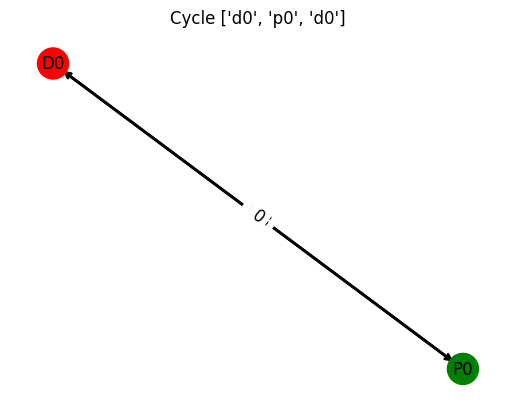

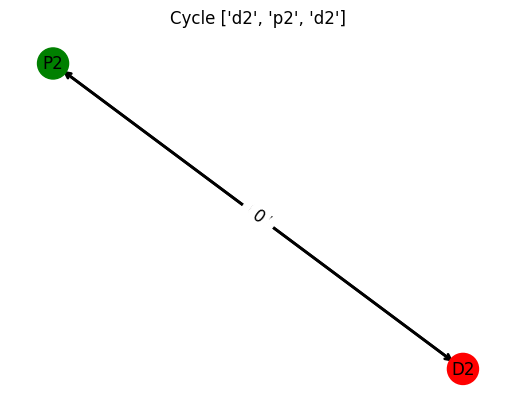

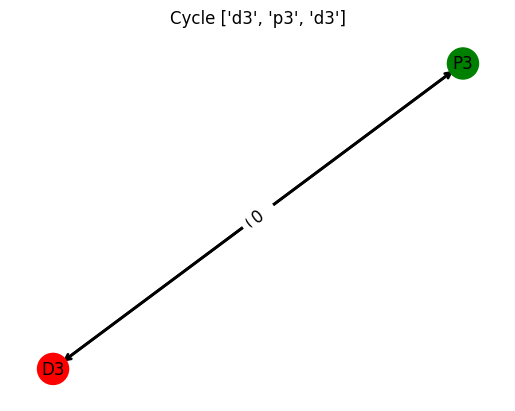

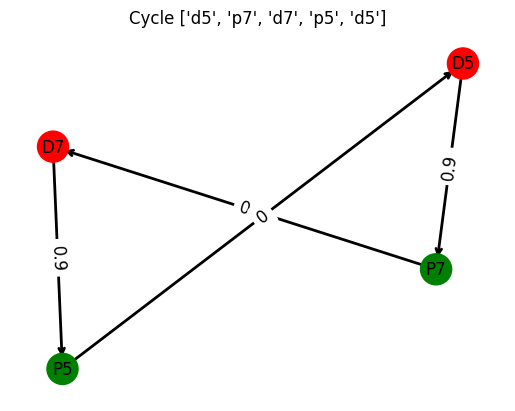

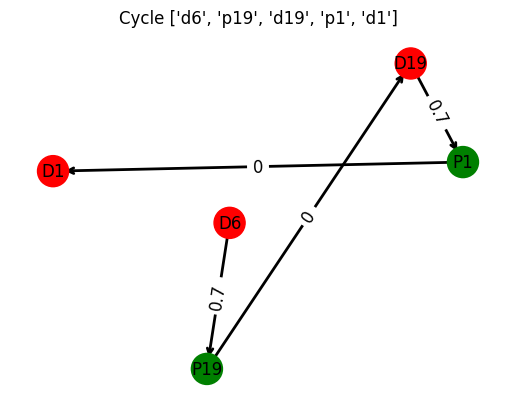

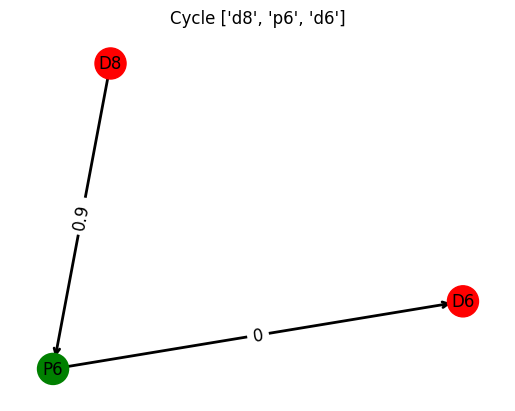

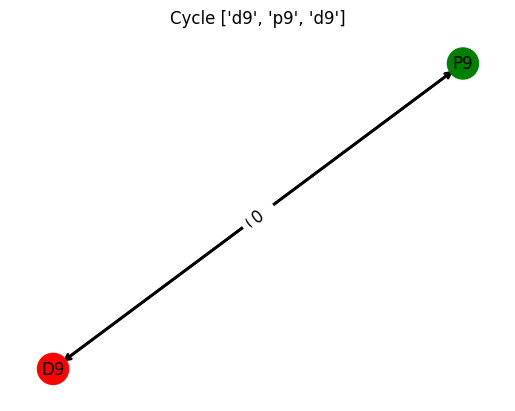

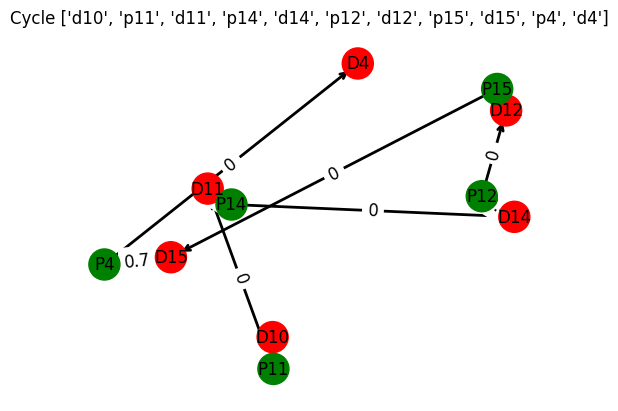

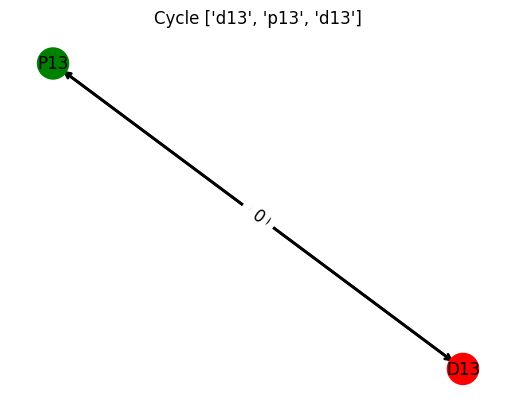

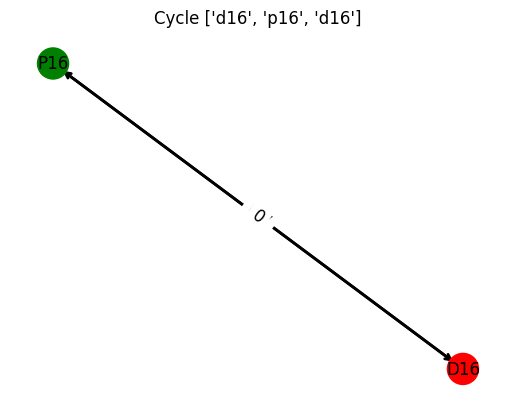

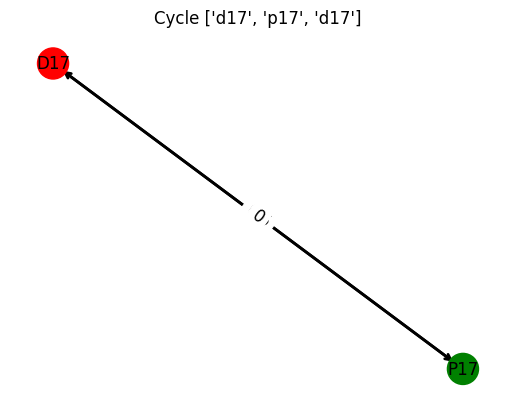

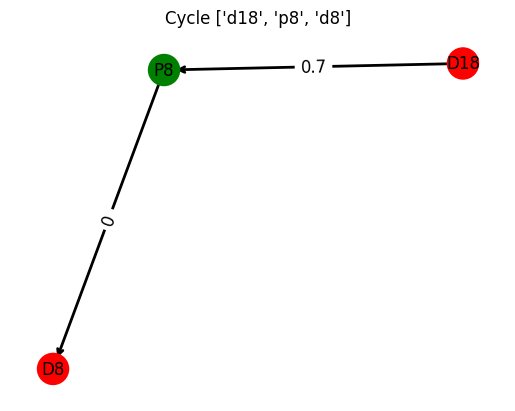

In [4]:
#Here we draw the graph
from draw_donation_cycle import *
draw_donation_cycle_graph(cycles, weights)

Below We have the implementation of the Positive cycle elimination algorithm. 

In [5]:
def positive_cycle_elimination(G, weights):
    V = G.keys()  # Vertices of the graph
    E = [(u, v) for u in G for v in G[u]]  # Edges of the graph

    def construct_residual_graph(x):
        F = [(u, v) for (u, v) in E if x[u][v] == 0]  # Forward edges
        B = [(v, u) for (u, v) in E if x[u][v] == 1]  # Backward edges
        return {v: [u for (x, u) in F + B if x == v] for v in V}

    def find_positive_cycle(G, weights):
        dist = {v: 0 for v in V}
        pred = {v: None for v in V}
        cycle = []

        for _ in range(len(V)):
            for (u, v) in E:
                if dist[u] + weights[(u, v)] < dist[v]:
                    dist[v] = dist[u] + weights[(u, v)]
                    pred[v] = u

                    # Check for positive-weight cycle
                    if _ == len(V) - 1:
                        cycle.append(v)
                        w = pred[v]
                        while w != v:
                            cycle.append(w)
                            w = pred[w]

                        return cycle

        return None

    def update_solution(x, cycle):
        for i in range(len(cycle)):
            u = cycle[i]
            v = cycle[(i + 1) % len(cycle)]
            if (u, v) in E:
                x[u][v] = 1
            elif (v, u) in E:
                x[v][u] = 0

        return x

    # Initial solution
    x = {u: {v: 0 for v in G[u]} for u in G}

    while True:
        residual_graph = construct_residual_graph(x)
        cycle = find_positive_cycle(residual_graph, weights)

        if cycle is None:
            break

        x = update_solution(x, cycle)

    return x


# Part2: Implementation of the model with M max Constraints

In [6]:
# Here we compute the solution with Gurobi
weights, init_graph_sol = solve_kidney_exchange('normal.csv', True)

Start solving for kidney exchange with cycle
end of solving for kidney exchange with cycle

Optimal solution with cycle length of maximum = 3
The objective value is 13.299999999999999
[('0', '4'), ('2', '2'), ('3', '3'), ('4', '0'), ('5', '7'), ('6', '19'), ('7', '5'), ('8', '6'), ('9', '9'), ('10', '10'), ('11', '14'), ('12', '15'), ('13', '13'), ('14', '12'), ('16', '16'), ('18', '17'), ('19', '1')]

Assign donor 0 to patient 4
Assign donor 2 to patient 2
Assign donor 3 to patient 3
Assign donor 4 to patient 0
Assign donor 5 to patient 7
Assign donor 6 to patient 19
Assign donor 7 to patient 5
Assign donor 8 to patient 6
Assign donor 9 to patient 9
Assign donor 10 to patient 10
Assign donor 11 to patient 14
Assign donor 12 to patient 15
Assign donor 13 to patient 13
Assign donor 14 to patient 12
Assign donor 16 to patient 16
Assign donor 18 to patient 17
Assign donor 19 to patient 1
Cycles of the solution: [['8', '6', '19', '1'], ['18', '17'], ['11', '14', '12', '15'], ['10', '10'], 

In [7]:
#Here we extract the cycle from the solution to draw the graph
cycles = find_disjoint_cycles(copy.deepcopy(init_graph_sol))

# Print the disjoint cycles
print("Disjoint cycles:")
for cycle in cycles:
    print(cycle)

Disjoint cycles:
['d0', 'p4', 'd4', 'p0', 'd0']
['d2', 'p2', 'd2']
['d3', 'p3', 'd3']
['d5', 'p7', 'd7', 'p5', 'd5']
['d6', 'p19', 'd19', 'p1', 'd1']
['d8', 'p6', 'd6']
['d9', 'p9', 'd9']
['d10', 'p10', 'd10']
['d11', 'p14', 'd14', 'p12', 'd12', 'p15', 'd15']
['d13', 'p13', 'd13']
['d16', 'p16', 'd16']
['d18', 'p17', 'd17']


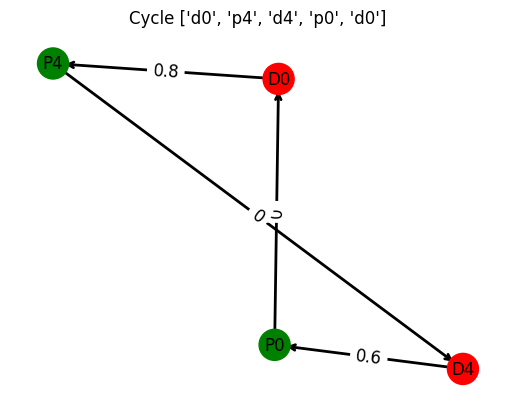

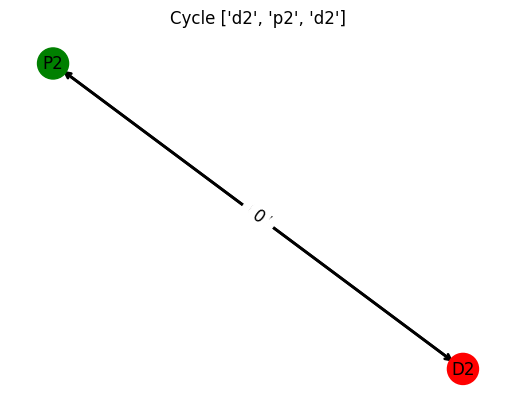

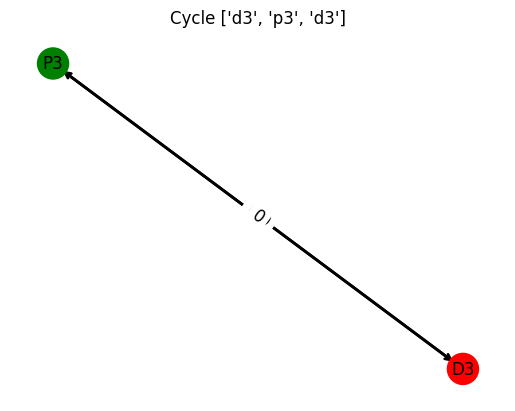

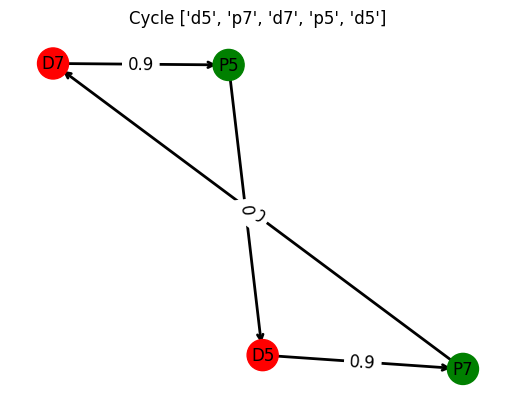

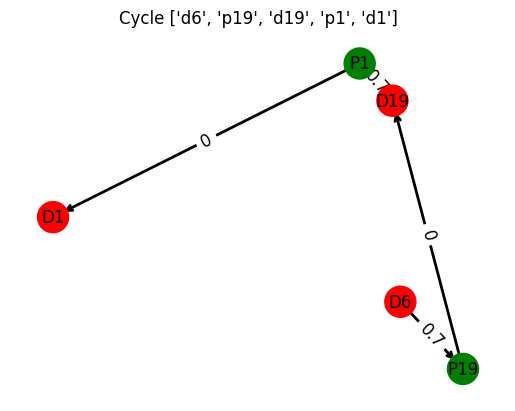

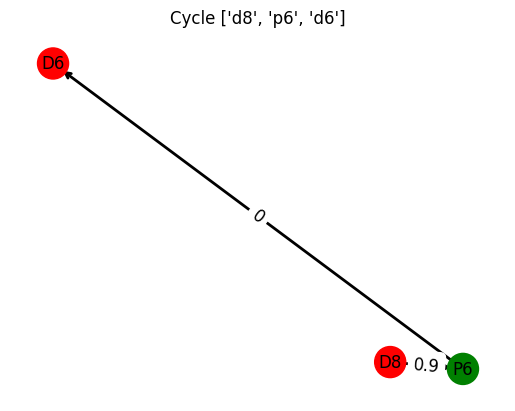

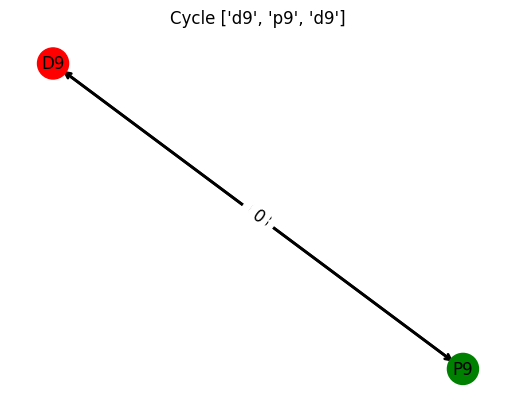

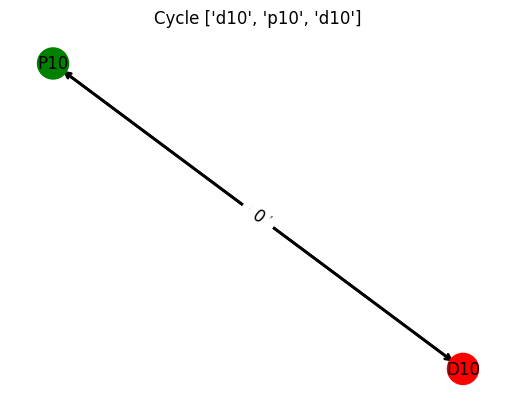

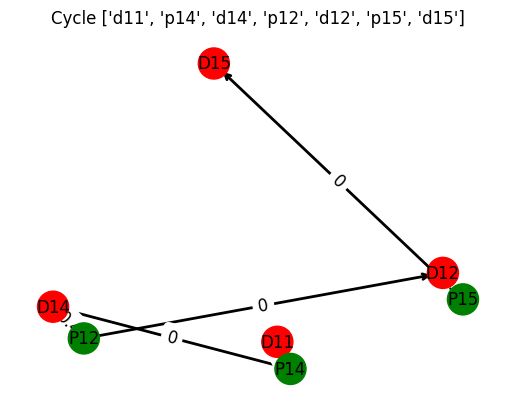

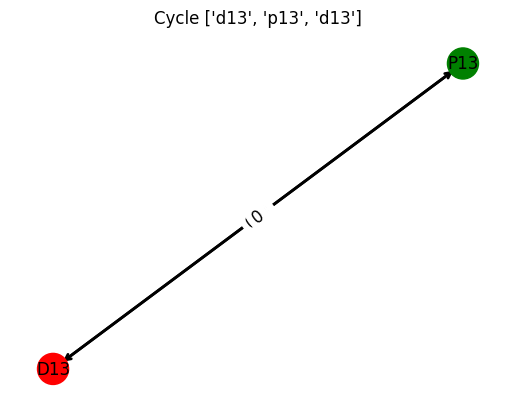

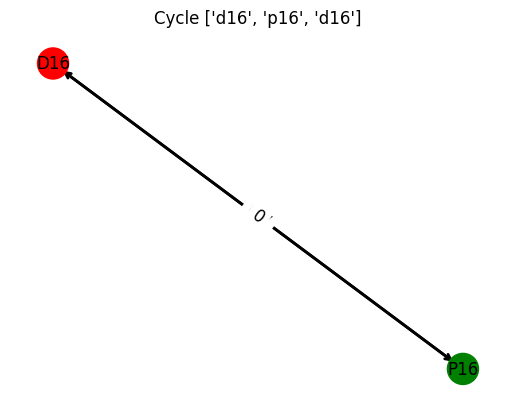

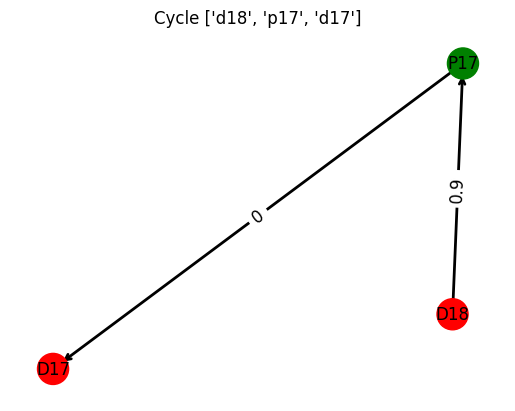

In [8]:
# Here we draw the graph
draw_donation_cycle_graph(cycles, weights)